In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

# - 표시 오류 해결
mpl.rcParams['axes.unicode_minus'] = False

# 한글폰트 굴림으로 설정
font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)
mpl.rcParams.update({'font.size': 15})

In [2]:
customer = pd.read_excel("월별소비자동향조사.xlsx")
customer.head(-5)

,지수코드별,분류코드별,항목,단위,2018. 01 월,2018. 02 월,2018. 03 월,2018. 04 월,2018. 05 월,2018. 06 월,...,2020. 01 월,2020. 02 월,2020. 03 월,2020. 04 월,2020. 05 월,2020. 06 월,2020. 07 월,2020. 08 월,2020. 09 월,2020. 10 월
0,현재생활형편CSI,전체,소비자동향,NaN,94.0,94.0,95.0,95.0,95.0,94.0,...,93.0,91.0,83.0,77.0,79.0,84.0,85.0,85.0,81.0,86.0
1,현재생활형편CSI,남자,소비자동향,NaN,94.0,94.0,95.0,94.0,95.0,94.0,...,93.0,91.0,82.0,76.0,79.0,84.0,85.0,85.0,81.0,86.0
2,현재생활형편CSI,여자,소비자동향,NaN,95.0,94.0,95.0,95.0,97.0,95.0,...,95.0,94.0,84.0,79.0,80.0,85.0,86.0,86.0,81.0,86.0
3,현재생활형편CSI,40세미만,소비자동향,NaN,96.0,98.0,99.0,100.0,98.0,99.0,...,97.0,96.0,90.0,87.0,87.0,90.0,90.0,91.0,87.0,92.0
4,현재생활형편CSI,40-50세,소비자동향,NaN,96.0,93.0,96.0,95.0,96.0,94.0,...,96.0,96.0,85.0,77.0,81.0,86.0,87.0,86.0,83.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,임금수준전망CSI,200-300만원,소비자동향,NaN,122.0,119.0,117.0,116.0,117.0,115.0,...,118.0,114.0,111.0,103.0,105.0,107.0,111.0,112.0,107.0,109.0
520,임금수준전망CSI,300-400만원,소비자동향,NaN,126.0,123.0,121.0,119.0,121.0,117.0,...,118.0,115.0,108.0,99.0,100.0,102.0,107.0,109.0,102.0,108.0
521,임금수준전망CSI,400-500만원,소비자동향,NaN,129.0,122.0,124.0,121.0,121.0,120.0,...,117.0,114.0,106.0,103.0,102.0,104.0,108.0,111.0,104.0,109.0
522,임금수준전망CSI,500만원이상,소비자동향,NaN,126.0,125.0,121.0,120.0,120.0,120.0,...,121.0,117.0,110.0,101.0,104.0,105.0,111.0,111.0,105.0,110.0


In [3]:
#코로나 이전|이후 비교

df = customer.loc[customer['지수코드별'] == '소비자심리지수']
df1 = df.iloc[:, 4:28]
df2 = df.iloc[:, 28:]

In [4]:
df = df.T

In [5]:
df1 = df1.T

In [6]:
df2 = df2.T

In [7]:
df1

,528
2018. 01 월,110.3
2018. 02 월,108.4
2018. 03 월,108.3
2018. 04 월,107.3
2018. 05 월,108.2
2018. 06 월,105.6
2018. 07 월,100.9
2018. 08 월,99.0
2018. 09 월,100.1
2018. 10 월,99.3


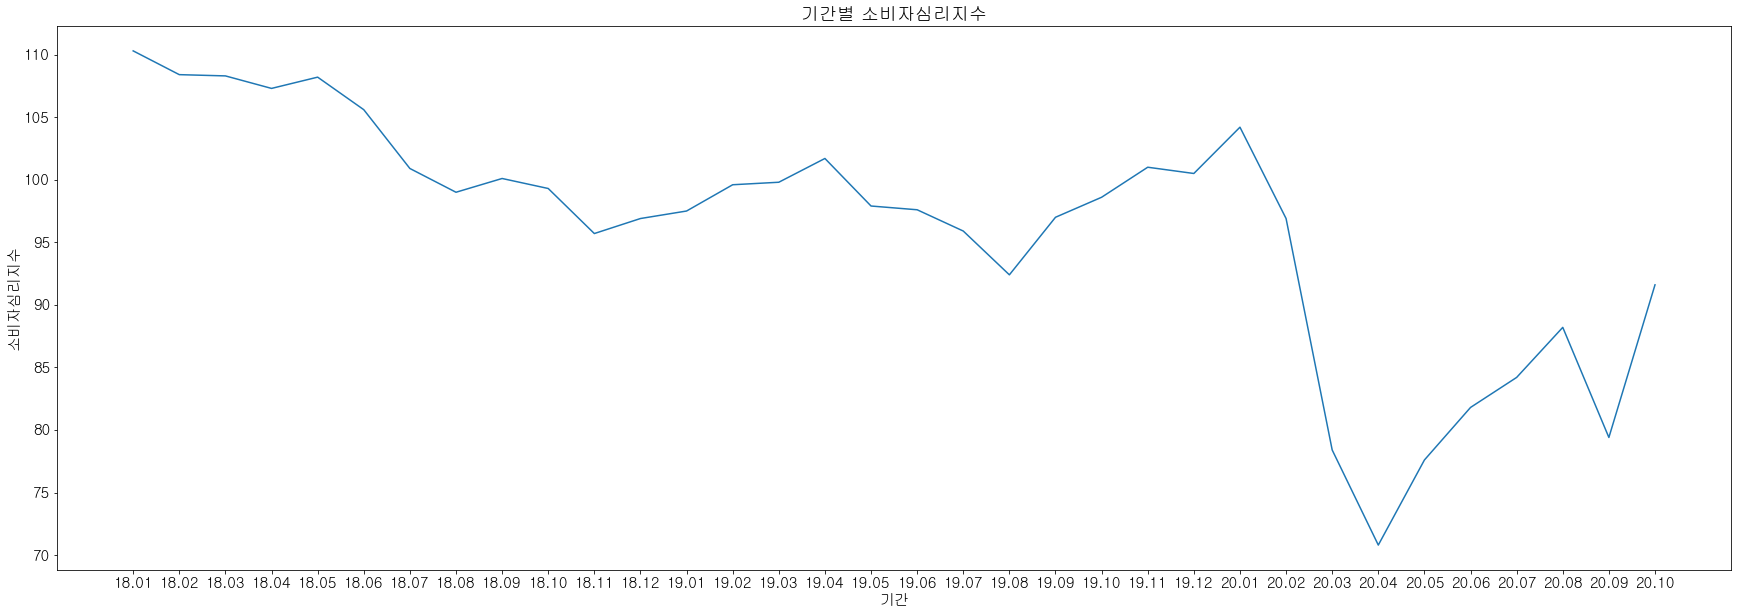

In [18]:
x = ['18.01','18.02','18.03','18.04','18.05','18.06','18.07','18.08','18.09','18.10','18.11','18.12',
    '19.01','19.02','19.03','19.04','19.05','19.06','19.07','19.08','19.09','19.10','19.11','19.12',
    '20.01','20.02','20.03','20.04','20.05','20.06','20.07','20.08','20.09','20.10']
y = [110.3, 108.4, 108.3, 107.3, 108.2, 105.6, 100.9, 99, 100.1, 99.3, 95.7, 96.9, 97.5, 99.6, 99.8, 101.7, 97.9, 97.6, 95.9, 92.4, 97.0, 98.6, 101, 100.5, 104.2, 96.9, 78.4, 70.8, 77.6, 81.8, 84.2, 88.2, 79.4, 91.6]
plt.figure(figsize=(30,10))
plt.plot(x,y)
plt.xlabel('기간')
plt.ylabel('소비자심리지수')
plt.title('기간별 소비자심리지수')
plt.show()

In [19]:
df2

,528
2020. 01 월,104.2
2020. 02 월,96.9
2020. 03 월,78.4
2020. 04 월,70.8
2020. 05 월,77.6
2020. 06 월,81.8
2020. 07 월,84.2
2020. 08 월,88.2
2020. 09 월,79.4
2020. 10 월,91.6


In [10]:
mannwhitneyu(df1, df2)

MannwhitneyuResult(statistic=21.5, pvalue=0.00010597307437608049)

In [20]:
#코로나 이후 1차, 2차 비교
df3 = df2.iloc[1:5]
df4 = df2.iloc[7:]
df3

,528
2020. 02 월,96.9
2020. 03 월,78.4
2020. 04 월,70.8
2020. 05 월,77.6


In [21]:
df4

,528
2020. 08 월,88.2
2020. 09 월,79.4
2020. 10 월,91.6


In [22]:
mannwhitneyu(df3, df4)

MannwhitneyuResult(statistic=3.0, pvalue=0.188379558905791)